In [12]:
import pandas as pd
import json
from tqdm import tqdm

meta_columns = ["asin", "brand", "title"]

meta_headphones = pd.DataFrame(columns = meta_columns)

meta_asin_index = {}

with open("meta_Electronics.json", 'r') as file:

    print("Loading meta_Electronics.json in dataframe")

    pbar = tqdm(total = 786868)
    
    while True:

        line = file.readline()

        if not line:
            break

        data = json.loads(line)

        if all(i in data for i in meta_columns) and ("headphone" in data["title"].lower()):

            meta_asin_index[data["asin"]] = len(meta_headphones)
            meta_headphones.loc[len(meta_headphones)] = data
        
        pbar.update()

meta_headphones.info()

Loading meta_Electronics.json in dataframe


100%|█████████▉| 786247/786868 [02:14<00:00, 2608.68it/s] 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27412 entries, 0 to 27411
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   asin    27412 non-null  object
 1   brand   27412 non-null  object
 2   title   27412 non-null  object
dtypes: object(3)
memory usage: 856.6+ KB


100%|█████████▉| 786445/786868 [02:33<00:00, 2608.68it/s]

In [18]:
headphones_columns = ["asin", "overall", "reviewText", "unixReviewTime"]

headphones = pd.DataFrame(columns = headphones_columns)

with open("Electronics_5.json", 'r') as file:

    print("Loading Electronics_5.json in dataframe")

    pbar = tqdm(total = 6739590)
    
    while True:

        line = file.readline()

        if not line:
            break

        data = json.loads(line)

        if all(i in data for i in headphones_columns) and (data["asin"] in meta_asin_index):

            headphones.loc[len(headphones)] = data
        
        pbar.update()

headphones.info()

Loading Electronics_5.json in dataframe


100%|█████████▉| 6739532/6739590 [2:05:15<00:00, 740.40it/s]  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411147 entries, 0 to 411146
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   asin            411147 non-null  object 
 1   overall         411147 non-null  float64
 2   reviewText      411147 non-null  object 
 3   unixReviewTime  411147 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 15.7+ MB


100%|██████████| 6739590/6739590 [2:05:32<00:00, 740.40it/s]

In [27]:
meta_headphones = meta_headphones.drop_duplicates(subset = "asin")

In [33]:
good_ratings = headphones.apply(lambda x : True if x["overall"] >= 3 else False, axis = 1)

print(f"Number of reviews: {len(headphones)}")
print(f"Average Rating Score: {headphones.loc[:, 'overall'].mean()}")
print(f"Number of Unique Products: {len(meta_headphones)}")
print(f"Number of Good Rating: {len(good_ratings[good_ratings == True].index)}")
print(f"Number of Bad Ratings: {len(headphones) - len(good_ratings[good_ratings == True].index)}")
print("Number of Reviews corresponding to each Rating:")
print(headphones.groupby("overall").size())

Number of reviews: 411147
Average Rating Score: 4.11210832135465
Number of Unique Products: 26865
Number of Good Rating: 353349
Number of Bad Ratings: 57798
Number of Reviews corresponding to each Rating:
overall
1.0     31007
2.0     26791
3.0     40754
4.0     79145
5.0    233450
dtype: int64


In [41]:
import re
from unidecode import unidecode
import contractions
import nltk

wnl = nltk.stem.WordNetLemmatizer()
stop_words = set(nltk.corpus.stopwords.words("english"))

def remove_html_tags(text):
    text = text.lower()
    pattern = re.compile(r'<.*?>')
    return re.sub(pattern, '', text)

def remove_accents(text):
    return unidecode(text)

def expand_words(text):
    expanded_words = []

    for word in text.split():
        expanded_words.append(contractions.fix(word))
    
    return ' '.join(expanded_words)

def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

def tokenize_text(text):
    return nltk.word_tokenize(text)

def lemmatize(tokens):
    return [wnl.lemmatize(token) for token in tokens if token not in stop_words]

def text_preprocessing(text):
    text = remove_html_tags(text)
    text = remove_accents(text)
    text = expand_words(text)
    text = remove_special_characters(text)
    tokens = tokenize_text(text)
    return lemmatize(tokens)

pbar = tqdm(total = len(headphones))

for i in range(len(headphones)):
    if isinstance(headphones.loc[i, "reviewText"], str):
        headphones.at[i, "reviewText"] = text_preprocessing(headphones.loc[i, "reviewText"])
    pbar.update()

print(headphones.head())

100%|█████████▉| 410894/411147 [03:39<00:00, 2542.87it/s] 

         asin  overall                                         reviewText  \
0  4126895493      5.0                    [great, headphone, cord, short]   
1  4126895493      5.0  [really, like, headphone, wanted, something, o...   
2  4126895493      1.0           [wire, headphone, broke, le, month, buy]   
3  4126895493      3.0                                             [good]   
4  4126895493      1.0  [currently, returning, product, sound, come, s...   

   unixReviewTime  
0      1424563200  
1      1494201600  
2      1478304000  
3      1474675200  
4      1468713600  


100%|██████████| 411147/411147 [03:57<00:00, 2542.87it/s]

In [42]:
import pickle

with open("headphones.pickle", "wb") as file:
    pickle.dump(headphones, file)

with open("meta_headphones.pickle", "wb") as file:
    pickle.dump(meta_headphones, file)

In [6]:
meta_asin_index = {}

for i in range(len(meta_headphones)):
    meta_asin_index[meta_headphones.loc[i, "asin"]] = i

with open("meta_asin_index.pickle", "wb") as file:
    pickle.dump(meta_asin_index, file)

KeyError: 569

In [21]:
import pickle

with open("headphones.pickle", "rb") as file:
    headphones = pickle.load(file)

with open("meta_headphones.pickle", "rb") as file:
    meta_headphones = pickle.load(file)

meta_asin_index = {}

for i,R in meta_headphones.iterrows():
    meta_asin_index[R["asin"]] = i

with open("meta_asin_index.pickle", "wb") as file:
    pickle.dump(meta_asin_index, file)

headphones["brand"] = headphones.apply(lambda x : meta_headphones.loc[meta_asin_index[x["asin"]], "brand"], axis = 1)



In [22]:
headphones.head()

asin  overall                                         reviewText  \
0  4126895493      5.0                    [great, headphone, cord, short]   
1  4126895493      5.0  [really, like, headphone, wanted, something, o...   
2  4126895493      1.0           [wire, headphone, broke, le, month, buy]   
3  4126895493      3.0                                             [good]   
4  4126895493      1.0  [currently, returning, product, sound, come, s...   

   unixReviewTime     brand  
0      1424563200  HeadGear  
1      1494201600  HeadGear  
2      1478304000  HeadGear  
3      1474675200  HeadGear  
4      1468713600  HeadGear

In [23]:
brandwiseReviews = headphones.groupby(['brand'])['brand'].count()
brandwiseReviews = brandwiseReviews.sort_values()
print("Top 20 most reviewed brands in headphones:")
print(brandwiseReviews[:-20:-1])

Top 20 most reviewed brands in headphones:
brand
Sony              28510
Sennheiser        19238
Bose              10026
JVC                7187
Audio-Technica     6670
Etre Jeune         5894
Mpow               5566
Panasonic          5356
iNassen            5353
Philips            5321
Bluedio            5312
EldHus             5054
Koss               4633
MEE audio          4486
Symphonized        4284
XBRN               4243
TaoTronics         4082
V-MODA             4079
Beats              3914
Name: brand, dtype: int64


In [24]:
print("Top 20 most least brands in headphones:")
print(brandwiseReviews[:20])

Top 20 most least brands in headphones:
brand
Honda                      2
NOIZY Brands               3
AIRDRIVES                  3
DSI                        4
California Cable Market    4
Pashion                    5
SpongeBob SquarePants      5
Comfort Audio              5
Wireless Pro               5
American Audio             5
American DJ Supply         5
Musair                     5
Bell'O Digital             5
Wireless Transit           5
Orange Bolt                5
Best Compu                 5
Keeda                      5
Haldirect                  5
Amphony                    5
Amplivox                   5
Name: brand, dtype: int64


In [25]:
import pickle


with open("headphones.pickle", "wb") as file:
    pickle.dump(headphones, file)

with open("meta_headphones.pickle", "wb") as file:
    pickle.dump(meta_headphones, file)

with open("meta_asin_index.pickle", "wb") as file:
    pickle.dump(meta_asin_index, file)

In [26]:
with open("headphones.pickle", "rb") as file:
    headphones = pickle.load(file)

with open("meta_headphones.pickle", "rb") as file:
    meta_headphones = pickle.load(file)

with open("meta_asin_index.pickle", "rb") as file:
    meta_asin_index = pickle.load(file)

In [27]:
headphones["positive"] = headphones.apply(lambda x : True if x["overall"] >= 3 else False, axis = 1)

In [30]:
review_distribution = headphones.groupby(["positive", "asin"]).size()
print(review_distribution.head())

positive  asin      
False     4126895493    21
          B000001OMI     6
          B000001OMR     7
          B00000J1EJ    22
          B00000J1FV     3
dtype: int64


In [33]:
n_positive_reviews = review_distribution[True].sort_values(ascending = False)

print("Most positively reviewed Headphone:")

print(meta_headphones.loc[meta_asin_index[n_positive_reviews.index[0]]])
print(f"No. of positive reviews: {n_positive_reviews[0]}")


Most positively reviewed Headphone:
asin                           B004WODP20
brand                                Sony
title    Sony MDRZX100 Headphones (Black)
Name: 4448, dtype: object
No. of positive reviews: 2850


In [34]:
with open("headphones.pickle", "wb") as file:
    pickle.dump(headphones, file)

with open("meta_headphones.pickle", "wb") as file:
    pickle.dump(meta_headphones, file)

with open("meta_asin_index.pickle", "wb") as file:
    pickle.dump(meta_asin_index, file)

In [35]:
with open("headphones.pickle", "rb") as file:
    headphones = pickle.load(file)

with open("meta_headphones.pickle", "rb") as file:
    meta_headphones = pickle.load(file)

with open("meta_asin_index.pickle", "rb") as file:
    meta_asin_index = pickle.load(file)

In [38]:
from datetime import datetime

headphones["year"] = headphones.apply(lambda x : datetime.fromtimestamp(x["unixReviewTime"]).year, axis = 1)
print(headphones.head())

         asin  overall                                         reviewText  \
0  4126895493      5.0                    [great, headphone, cord, short]   
1  4126895493      5.0  [really, like, headphone, wanted, something, o...   
2  4126895493      1.0           [wire, headphone, broke, le, month, buy]   
3  4126895493      3.0                                             [good]   
4  4126895493      1.0  [currently, returning, product, sound, come, s...   

   unixReviewTime     brand  positive  year  
0      1424563200  HeadGear      True  2015  
1      1494201600  HeadGear      True  2017  
2      1478304000  HeadGear     False  2016  
3      1474675200  HeadGear      True  2016  
4      1468713600  HeadGear     False  2016  


In [40]:
n_reviews_year = headphones.groupby(["year"]).size()
print(n_reviews_year)

year
2000       21
2001       22
2002       67
2003      140
2004      311
2005      752
2006     1166
2007     2392
2008     3542
2009     4903
2010     5740
2011     8710
2012    15332
2013    35536
2014    63336
2015    97661
2016    98362
2017    52482
2018    20672
dtype: int64


WordCloud for positive_reviews


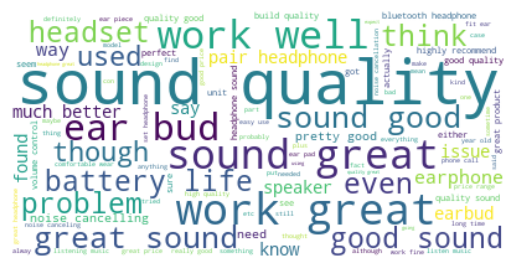

Most Commonly Used words in positive reviews:
['sound quality', 'work great', 'sound great', 'work well', 'ear bud', 'great sound', 'sound good', 'headset', 'battery life', 'good sound', 'think', 'problem', 'even', 'used', 'though', 'earphone', 'way', 'earbud', 'issue', 'know']


In [49]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


print("WordCloud for positive_reviews")
text = ' '.join(' '.join(i["reviewText"]) for j, i in headphones.iterrows() if i["positive"])

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

print("Most Commonly Used words in positive reviews:")

def func1(word):
    return wordcloud.words_[word]

freq_words_pos = list(wordcloud.words_.keys())

freq_words_pos.sort(key = func1, reverse=True)

print(freq_words_pos[:20])

WordCloud for negative_reviews


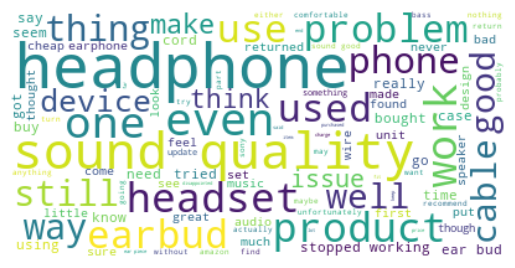

Most commonly used words in negative reviews:
['headphone', 'sound quality', 'even', 'one', 'work', 'product', 'headset', 'earbud', 'use', 'problem', 'used', 'phone', 'still', 'thing', 'way', 'well', 'cable', 'good', 'device', 'make']


In [50]:
text = ' '.join(' '.join(i["reviewText"]) for j, i in headphones.iterrows() if not(i["positive"]))

print("WordCloud for negative_reviews")

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

print("Most commonly used words in negative reviews:")

freq_words_neg = list(wordcloud.words_.keys())

freq_words_neg.sort(key = func1, reverse=True)

print(freq_words_neg[:20])

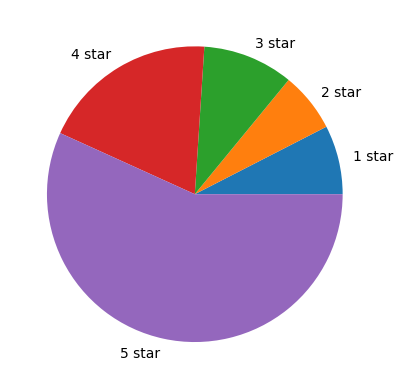

In [56]:
import numpy as np

ratings = np.array([headphones.groupby("overall").size()[i + 1] for i in range(5)])
mylabels = [f"{i + 1} star" for i in range(5)]

plt.pie(ratings, labels=mylabels)
plt.show()

In [61]:
print(f"The year the product got maximum reviews: {n_reviews_year.sort_values(ascending = False).index[0]}")
print(f"The year with maximum number of customers: {n_reviews_year.sort_values(ascending = False).index[0]}")

The year the product got maximum reviews: 2016
The year with maximum number of customers: 2016


In [62]:
headphones["actualReviewText"] = headphones.apply(lambda x : ' '.join(x["reviewText"]), axis = 1)

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(headphones.actualReviewText)


word_index = {}

for i, word in enumerate(tfidf_vectorizer.get_feature_names_out()):
    word_index[word] = i

print(X_tfidf[411146, word_index["half"]])

0.10283284682644778


In [64]:
def give_rating_class(x):
    if (x < 3):
        return 0
    elif (x == 3):
        return 1
    else:
        return 2

headphones["ratingClass"] = headphones.apply(lambda x : give_rating_class(x["overall"]), axis = 1)
print(headphones.head())

         asin  overall                                         reviewText  \
0  4126895493      5.0                    [great, headphone, cord, short]   
1  4126895493      5.0  [really, like, headphone, wanted, something, o...   
2  4126895493      1.0           [wire, headphone, broke, le, month, buy]   
3  4126895493      3.0                                             [good]   
4  4126895493      1.0  [currently, returning, product, sound, come, s...   

   unixReviewTime     brand  positive  year  \
0      1424563200  HeadGear      True  2015   
1      1494201600  HeadGear      True  2017   
2      1478304000  HeadGear     False  2016   
3      1474675200  HeadGear      True  2016   
4      1468713600  HeadGear     False  2016   

                                    actualReviewText  ratingClass  
0                         great headphone cord short            2  
1  really like headphone wanted something office ...            2  
2                  wire headphone broke le month b

In [65]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

# Fit and transform the text data
X_input = vectorizer.fit_transform(headphones.actualReviewText)

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_input, headphones.ratingClass, test_size=0.25, random_state=42)

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support

logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

y_pred_logreg = logreg_model.predict(X_test)


precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred_logreg, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1_score:.4f}")


temp1, temp2, temp3, support = precision_recall_fscore_support(y_test, y_pred_logreg)

print(f"Support: {support}")

Precision: 0.8030
Recall: 0.8330
F1-score: 0.8107
Support: [14438 10256 78093]


c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [72]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)


knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)


precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred_knn, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1_score:.4f}")


temp1, temp2, temp3, support = precision_recall_fscore_support(y_test, y_pred_knn)

print(f"Support: {support}")

Precision: 0.7281
Recall: 0.7733
F1-score: 0.7430
Support: [14438 10256 78093]


In [73]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear')

svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)


precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred_svm, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1_score:.4f}")


temp1, temp2, temp3, support = precision_recall_fscore_support(y_test, y_pred_svm)

print(f"Support: {support}")


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)


precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred_rf, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1_score:.4f}")


temp1, temp2, temp3, support = precision_recall_fscore_support(y_test, y_pred_rf)

print(f"Support: {support}")

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()

nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)


precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred_nb, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1_score:.4f}")


temp1, temp2, temp3, support = precision_recall_fscore_support(y_test, y_pred_nb)

print(f"Support: {support}")

In [ ]:
unique_users = headphones['reviewerID'].unique()
unique_items = headphones['asin'].unique()

user_item_matrix = pd.DataFrame(index=unique_users, columns=unique_items)
user_item_matrix.fillna(0, inplace=True)

for _, row in headphones.iterrows():
    user = row['reviewerID']
    item = row['asin']
    rating = row['overall']
    user_item_matrix.loc[user, item] = rating

In [ ]:
min_rating = user_item_matrix.min().min()
max_rating = user_item_matrix.max().max()

user_item_matrix_normalized = (user_item_matrix - min_rating) / (max_rating - min_rating)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import KFold

user_similarity = cosine_similarity(user_item_matrix)

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

mae_values = []
N_values = [10, 20, 30, 40, 50]

for N in N_values:
    total_mae = 0

    for train_idx, val_idx in kf.split(user_item_matrix):
        train_matrix = user_item_matrix.iloc[train_idx]
        val_matrix = user_item_matrix.iloc[val_idx]

        top_N_users = np.argsort(user_similarity, axis=1)[:, -N:]
        predicted_ratings = np.zeros_like(val_matrix)

        for i, user in enumerate(val_matrix.index):
            for j, item in enumerate(val_matrix.columns):
                if val_matrix.loc[user, item] == 0:
                    similar_users = top_N_users[i]
                    predicted_ratings[i, j] = np.mean(train_matrix.loc[similar_users, item])
    

        actual_ratings = val_matrix.values
        mae = np.abs(actual_ratings - predicted_ratings).sum() / np.count_nonzero(actual_ratings)
        total_mae += mae
        
    avg_mae = total_mae / k
    mae_values.append(avg_mae)


for N, mae in zip(N_values, mae_values):
    print(f"MAE for N={N}: {mae:.4f}")